# Logistic Regression

In [11]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [12]:
data = pd.read_csv('./datasets/titanic_train.csv')
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA


<AxesSubplot: xlabel='Survived', ylabel='count'>

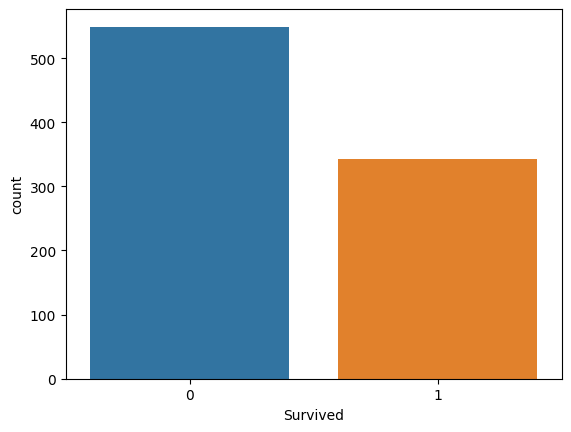

In [15]:
sns.countplot(x='Survived',data=data)


<AxesSubplot: xlabel='Survived', ylabel='count'>

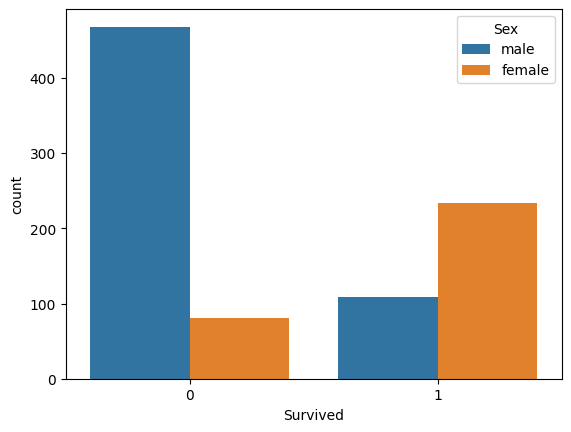

In [16]:
sns.countplot(x='Survived',hue='Sex',data=data)


<AxesSubplot: xlabel='Survived', ylabel='count'>

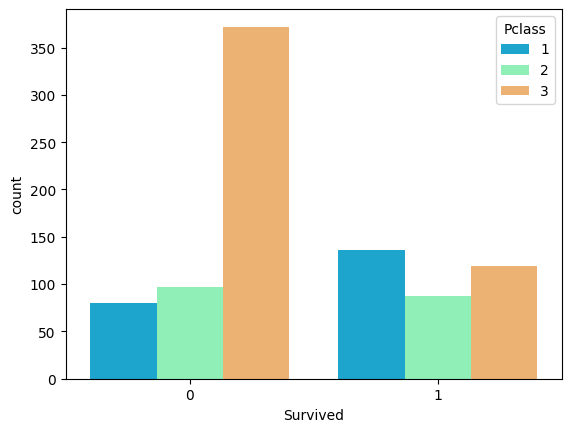

In [17]:
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')


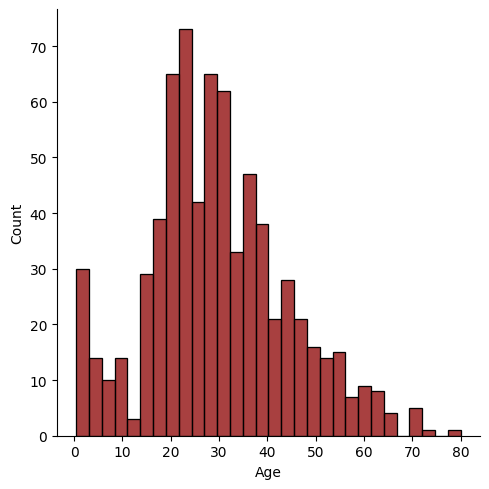

In [18]:
sns.displot(data['Age'].dropna(),color='darkred',bins=30)


<AxesSubplot: xlabel='SibSp', ylabel='count'>

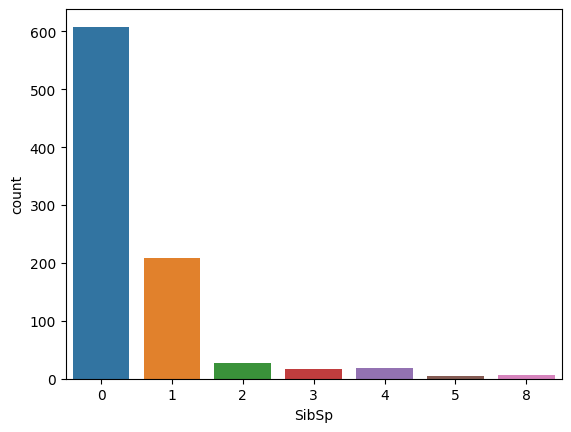

In [19]:
sns.countplot(x='SibSp',data=data)


<AxesSubplot: >

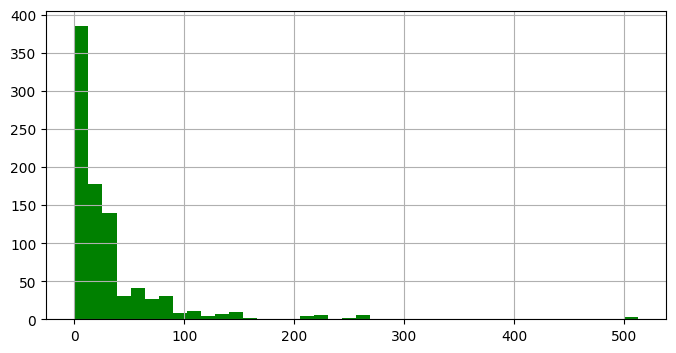

In [20]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))


<AxesSubplot: xlabel='Pclass', ylabel='Age'>

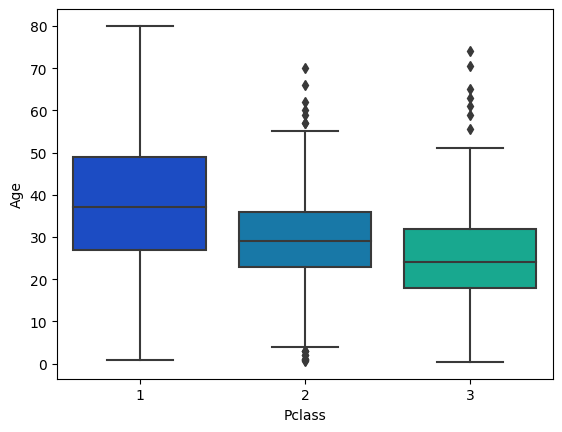

In [21]:
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

<AxesSubplot: >

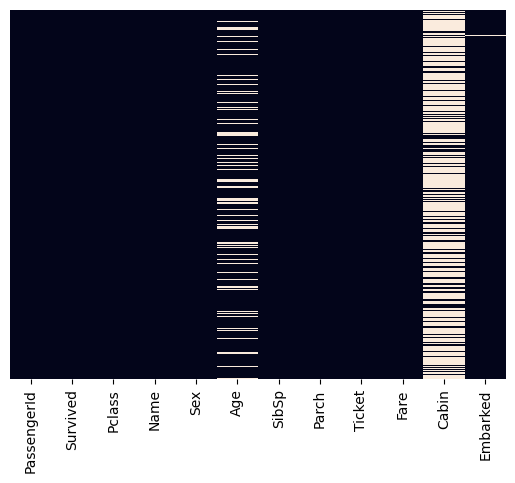

In [22]:
# finds the missing values in the dataset
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [23]:
# impute the age column with the mean of the Pclass age
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return data[data["Pclass"] == Pclass]["Age"].mean()
    else:
        return Age

# now apply the function
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)


In [24]:
data['Age']
data[['Age']]

,Age
0,22.00000
1,38.00000
2,26.00000
3,35.00000
4,35.00000
...,...
886,27.00000
887,19.00000
888,25.14062
889,26.00000


In [25]:
data['Age'].isnull().sum()

0

In [26]:
# drop the cabin column
data.drop('Cabin',axis=1,inplace=True)


In [27]:
X = data.iloc[:, [2, 4, 5, 6, 7, 9, 10]] # independent features
y = data.iloc[:, 1] # dependent features or predicted value. Here, it is Survived column




In [28]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.00000,1,0,7.2500,S
1,1,female,38.00000,1,0,71.2833,C
2,3,female,26.00000,0,0,7.9250,S
3,1,female,35.00000,1,0,53.1000,S
4,3,male,35.00000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.00000,0,0,13.0000,S
887,1,female,19.00000,0,0,30.0000,S
888,3,female,25.14062,1,2,23.4500,S
889,1,male,26.00000,0,0,30.0000,C


In [29]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [30]:
# multicolinarity check 
data.corr()

C:\Users\as250199\AppData\Local\Temp\ipykernel_21664\2946929672.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.035256,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.050504,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.403858,0.083081,0.018443,-0.549500
Age,0.035256,-0.050504,-0.403858,1.000000,-0.243452,-0.175799,0.120886
SibSp,-0.057527,-0.035322,0.083081,-0.243452,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.175799,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.120886,0.159651,0.216225,1.000000


C:\Users\as250199\AppData\Local\Temp\ipykernel_21664\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<AxesSubplot: >

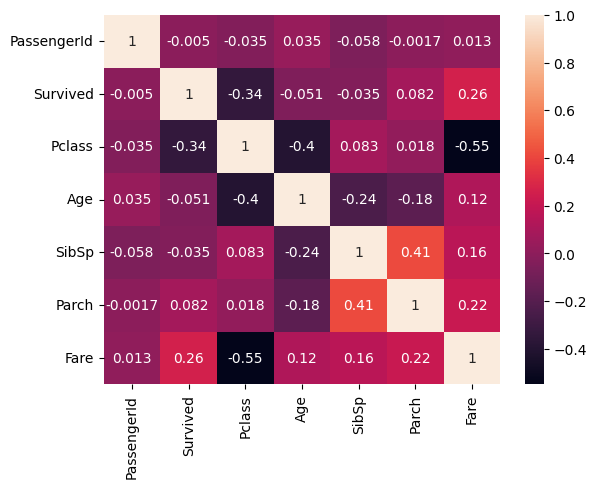

In [31]:
sns.heatmap(data.corr(), annot=True)

# Categorical data to numerical data


In [32]:
sex = pd.get_dummies(X['Sex'], prefix = 'Sex')
sex

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [33]:
sex.drop('Sex_male', inplace = True, axis=1)

In [34]:
embark = pd.get_dummies(X['Embarked'], prefix = 'Embarked', drop_first=True)
embark

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [35]:
passenger_class = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
passenger_class.drop('Pclass_3', inplace = True, axis=1)

In [36]:
X.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)


C:\Users\as250199\AppData\Local\Temp\ipykernel_21664\3300952753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)


In [37]:
X = pd.concat([X,sex,embark, passenger_class],axis=1)

In [38]:
X

,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S,Pclass_1,Pclass_2
0,22.00000,1,0,7.2500,0,0,1,0,0
1,38.00000,1,0,71.2833,1,0,0,1,0
2,26.00000,0,0,7.9250,1,0,1,0,0
3,35.00000,1,0,53.1000,1,0,1,1,0
4,35.00000,0,0,8.0500,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,0,0,1,0,1
887,19.00000,0,0,30.0000,1,0,1,1,0
888,25.14062,1,2,23.4500,1,0,1,0,0
889,26.00000,0,0,30.0000,0,0,0,1,0


Text(0.5, 1.0, 'Outlier Box Plot')

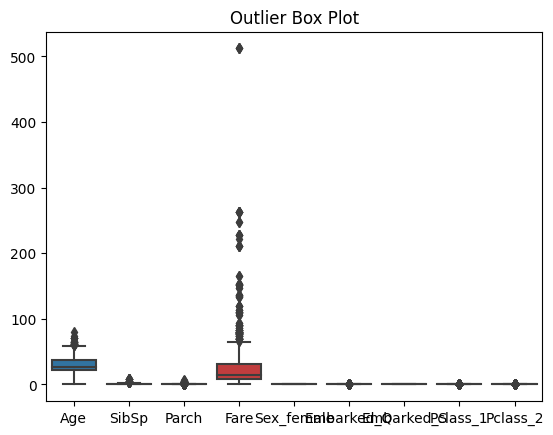

In [39]:
sns.boxplot(data= X).set_title("Outlier Box Plot")

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
# Feature Scaling #Need to be done after splitting
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, [0,3]] = sc.fit_transform(X_train.iloc[:, [0,3]])
X_test.iloc[:, [0,3]] = sc.transform(X_test.iloc[:, [0,3]])

In [42]:
X_train

,Age,SibSp,Parch,Fare,Sex_female,Embarked_Q,Embarked_S,Pclass_1,Pclass_2
253,0.060157,1,0,-0.330749,0,0,1,0,0
763,0.516637,1,2,1.848049,1,0,1,1,0
177,1.581757,0,0,-0.066263,1,0,0,1,0
446,-1.233202,0,1,-0.259450,1,0,1,0,1
429,0.212317,0,0,-0.499558,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
140,-0.309544,0,2,-0.348661,1,0,0,0,0
58,-1.841842,1,2,-0.086446,1,0,1,0,1
764,-1.004962,0,0,-0.505325,0,0,1,0,0
833,-0.472402,0,0,-0.503664,0,0,1,0,0


In [43]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [45]:
preds = classifier.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.8212290502793296

In [29]:
#Find relevant features
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


In [30]:
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LogisticRegression(), scoring='accuracy')

In [ ]:
# don't read below this

In [31]:
print("Optimal number of features : %d" % rfecv.n_features_)


Optimal number of features : 9


AttributeError: 'RFECV' object has no attribute 'grid_scores_'

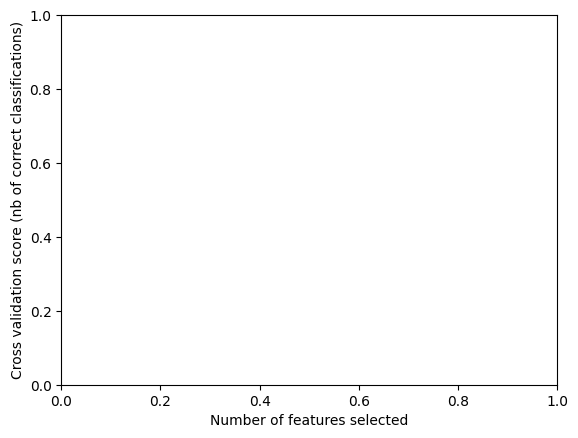

In [33]:
# Plot number of features VS. cross-validation scores

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")

plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

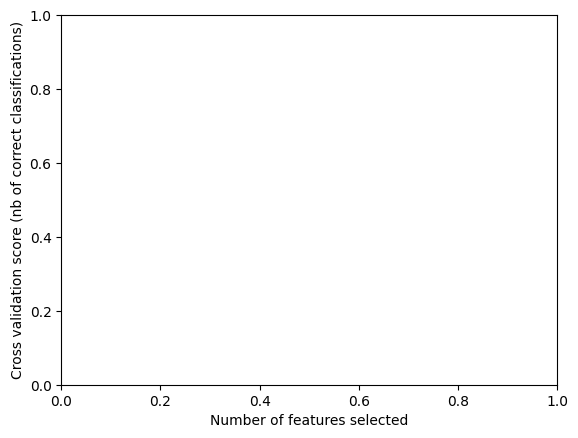

In [34]:
# plot number of features vs cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [35]:


from sklearn.feature_selection import RFE

rfe = RFE(classifier, n_features_to_select =rfecv.n_features_, step=1)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1]


In [36]:


# Predicting the Test set results
y_pred = classifier.predict(X_test)





# K-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()





In [37]:


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,99,14,113
1,18,48,66
All,117,62,179


In [38]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.85      0.88      0.86       113
           1       0.77      0.73      0.75        66

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



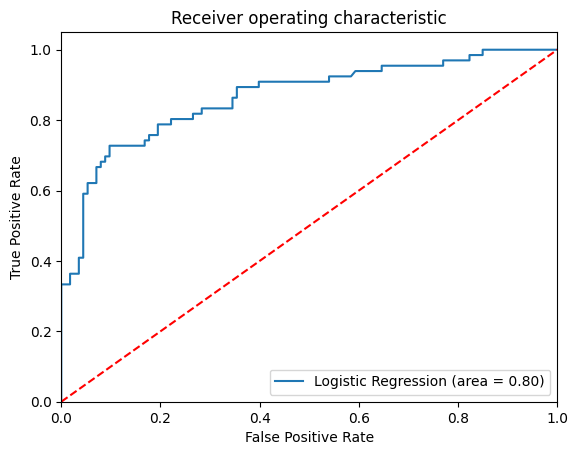

In [39]:

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()



In [ ]:

# code for train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [47]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, preds))
print("Precision:",metrics.precision_score(y_test, preds))
print("Recall:",metrics.recall_score(y_test, preds))

# calculate confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, preds)
print(confusion_matrix)




Accuracy: 0.8212290502793296
Precision: 0.828125
Recall: 0.7162162162162162
[[94 11]
 [21 53]]
